In [3]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

import wrangle as w
import explore as e
import model as m


# Acquire
* Aquire dataset from Codeup database
* It contained 7043 rows and 26 columns before cleaning
* Each row represents a customer at Telco
* Each column represents a feature of those customers

# Prepare
- Prepare Actions:

    * Removed columns that did not contain useful information
    * Renamed columns to promote readability
    * Checked for nulls in the data (there were nulls within churn_month column, which was dropped)
    * Checked that column data types were appropriate
    * Removed white space from total_charge columns with 0's and coverted type to float
    * Added automatic_payment column, which divides the four payment types in payment_type column into two categories: automatic or non-automatic
    * Removed features:
        - customer_id            
        - senior_citizen                         
        - phone_service            
        - monthly_charges        
        - total_charges          
        - payment_type           
      
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
    * Outliers have not been removed for this iteration of the project

# Data Dictionary 

In [2]:
# acquiring, cleaning, and adding features to data
df, exp_df = w.prep_telco()
df

# splitting data into train, validate, and test
target = "churn"
train, validate, test = w.split_data(df,target)


# Summarize df 

In [3]:
# overview of data
train.head()

,partner,dependents,paperless_billing,automatic_payment,churn
5911,0,1,1,1,0
2479,1,0,0,0,0
5889,0,0,1,0,1
6087,0,0,1,1,0
785,0,0,0,1,0


# Explore

## Question 1: What's the relationship between churn and payment type?

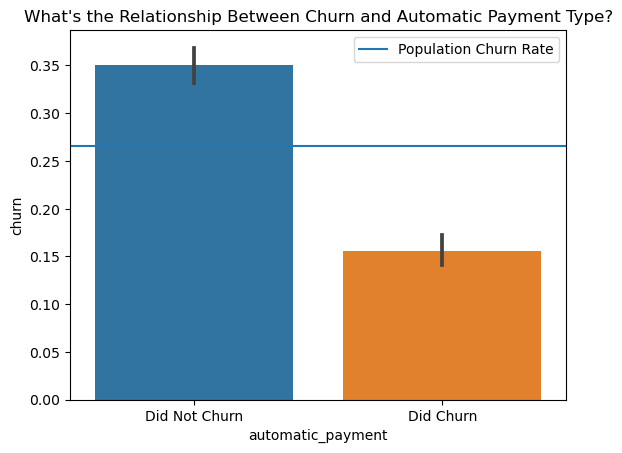

In [4]:
graph_title_Q1 = "What's the Relationship Between Churn and Automatic Payment Type?"
feature_Q1 = "automatic_payment"

e.relationship_churn(train, graph_title_Q1, feature_Q1, target)

In [10]:
# Chi squared to compare proportions, define confidence
alpha = 0.05
target_Q1 = "churn"
feature_variable_Q1 = "automatic_payment"
null_hypothesis_Q1 = "churn and automatic payment are independent"
alternative_hypothesis_Q1 = "there is a relationship between automatic payment and churn"

e.cross_function(train, target, feature_variable_Q1, null_hypothesis_Q1, alternative_hypothesis_Q1)

Reject the null hypothesis: churn and automatic payment are independent
Sufficient evidence to move forward understanding that, there is a relationship between automatic payment and churn


1.2588150001387785e-45

# Question 2:  What's the relationship between churn and paperless billing?

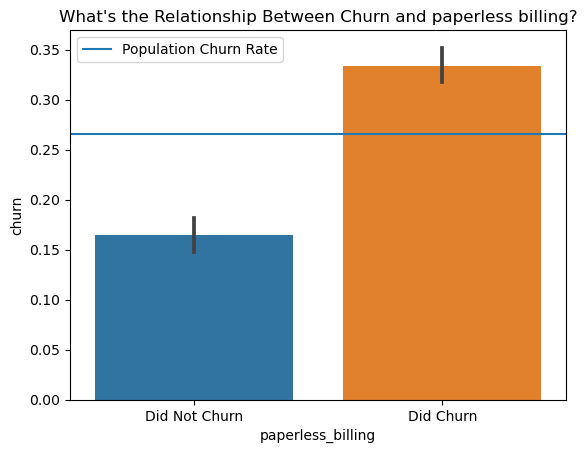

In [20]:
graph_title_Q2 = "What's the Relationship Between Churn and paperless billing?"
feature_Q2 = "paperless_billing"

e.relationship_churn(train, graph_title_Q2, feature_Q2, target)

In [21]:
# Chi squared to compare proportions, define confidence
alpha = 0.05

null_hypothesis_Q2 = "churn and paperless_billing are independent"
alternative_hypothesis_Q2 = "there is a relationship between paperless_billing and churn"

e.cross_function(train, target, feature_Q2, null_hypothesis_Q2, alternative_hypothesis_Q2)

Reject the null hypothesis: churn and paperless_billing are independent
Sufficient evidence to move forward understanding that, there is a relationship between paperless_billing and churn


3.5348504574964642e-34

# Question 3: What's the relationship between churn and customers' with partners?

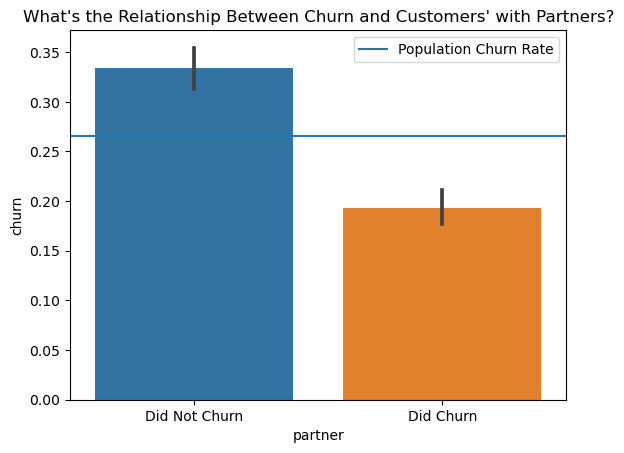

In [22]:
graph_title_Q3 = "What's the Relationship Between Churn and Customers' with Partners?"
feature_Q3 = "partner"

e.relationship_churn(train, graph_title_Q3, feature_Q3, target)

In [17]:
# Chi squared to compare proportions, define confidence
alpha = 0.05

null_hypothesis_Q3 = "churn and customers' with partners are independent"
alternative_hypothesis_Q3 = "there is a relationship between customers' with partners and churn"

e.cross_function(train, target, feature_Q3, null_hypothesis_Q3, alternative_hypothesis_Q3)

Reject the null hypothesis: churn and customers' with partners are independent
Sufficient evidence to move forward understanding that, there is a relationship between customers' with partners and churn


5.362120825511991e-25

# Question 4: What's the relationship between churn and customers' with dependents?

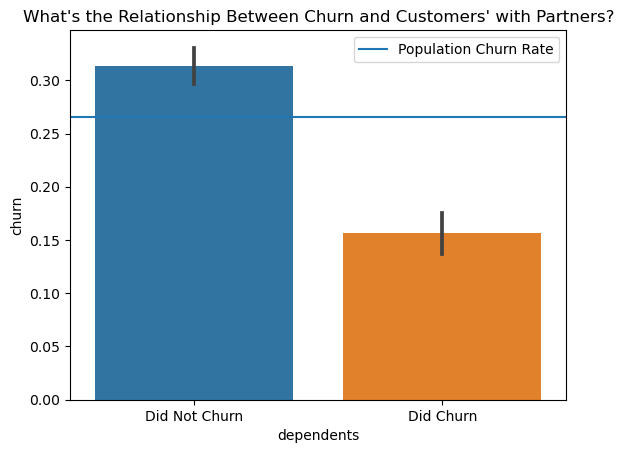

In [23]:
graph_title_Q4 = "What's the Relationship Between Churn and Customers' with Dependents"
feature_Q4 = "dependents"

e.relationship_churn(train, graph_title_Q3, feature_Q4, target)

In [24]:
alpha = 0.05

null_hypothesis_Q4 = "churn and customers' with dependents are independent"
alternative_hypothesis_Q4 = "there is a relationship between customers' with dependents and churn"

e.cross_function(train, target, feature_Q4, null_hypothesis_Q4, alternative_hypothesis_Q4)

Reject the null hypothesis: churn and customers' with dependents are independent
Sufficient evidence to move forward understanding that, there is a relationship between customers' with dependents and churn


4.0728740930257527e-26

* positive class:  not churned
* negative class:  churned

# Decision Tree Model  

In [16]:
# creating baseline:  1's = churned & 0's = not churned  baseline accuracy = 0.7346745562130178
# positive if not churned
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy


0.7346745562130178

In [17]:
# using a function to get x & y variables for the split dataset
x_train, y_train, x_validate, y_validate, x_test, y_test = m.create_x_y(train, validate, test, target)

In [18]:
# create object 
tree = DecisionTreeClassifier(random_state=3)

# model.fit(x, y)
tree = tree.fit(x_train, y_train)

print(f'''
Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train),2)}
Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),2)}
''')

{'Accuracy of Decision Tree classifier on training set': 0.74,
 'Accuracy of Decision Tree classifier on validation set': 0.72}

In [172]:
# make prediction on train obeservations
y_pred = tree.predict(x_train)

#estimate probablility 
y_pred_proba = tree.predict_proba(x_train)

In [124]:
# create confusion matrix
conf = confusion_matrix(y_train, y_pred)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,2724,380
1_actual,718,403


In [139]:
# check accuracy 
accuracy_score(y_train, y_pred)

0.7401183431952663

# Random Forest model

In [20]:
# create object
rf = RandomForestClassifier(random_state=3)

# fit model
rf.fit(x_train, y_train)

# evaluate feature importance
print(rf.feature_importances_)

[0.11720507 0.15751509 0.31153932 0.41374053]


In [21]:
# create prdictions
y_pred_rf = rf.predict(x_train)

# Estimate the probability
y_pred_proba_rf = rf.predict_proba(x_train)


In [22]:
# create confusion matrix
conf_rf = confusion_matrix(y_train, y_pred_rf)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf_rf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])


,0_predict,1_predict
0_actual,2724,380
1_actual,718,403


In [23]:
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3104
           1       0.51      0.36      0.42      1121

    accuracy                           0.74      4225
   macro avg       0.65      0.62      0.63      4225
weighted avg       0.72      0.74      0.72      4225



In [24]:
# evaluate model 
# rf train accuracy score = 0.7401183431952663
rf.score(x_train, y_train)

# rf  validate accuracy score = 0.7196593328601846
rf.score(x_validate, y_validate)

print(f'''
    Accuracy of RandomForest classifier on training set: {round(rf.score(x_train, y_train),2)}
    Accuracy of RandomForest classifier on validation set: {round(rf.score(x_validate, y_validate),2)}
''')


    Accuracy of RandomForest classifier on training set: 0.74
    Accuracy of RandomForest classifier on validation set: 0.72



# Linear Regression Model

In [25]:
# create object
logit = LogisticRegression()

# model fit 
logit.fit(x_train, y_train)

LogisticRegression()

In [26]:
# evaluate importance of each feature
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[-0.42184525 -0.55147039  0.90267313 -0.98603615]]
Intercept: 
 [-0.90162982]


In [27]:
# make predictions
y_pred_lr = logit.predict(x_train)
y_pred_proba_lr = logit.predict_proba(x_train)
# compute accuracy
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
''')

print(confusion_matrix(y_train, y_pred_lr))



    Accuracy of Logistic Regression classifier on training set: 0.74
    Accuracy of Logistic Regression classifier on validation set: 0.72

[[2724  380]
 [ 718  403]]


In [28]:
# classification report
print(classification_report(y_train, y_pred_lr))
y_pred_proba_lr

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3104
           1       0.51      0.36      0.42      1121

    accuracy                           0.74      4225
   macro avg       0.65      0.62      0.63      4225
weighted avg       0.72      0.74      0.72      4225



array([[0.82294999, 0.17705001],
       [0.78975929, 0.21024071],
       [0.49973917, 0.50026083],
       ...,
       [0.49973917, 0.50026083],
       [0.71128432, 0.28871568],
       [0.71128432, 0.28871568]])

# Test Model 

In [43]:
# Test Model
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
    Accuracy of Logistic Regression classifier on test set: {round(logit.score(x_test, y_test),2)}
    
''')



    Accuracy of Logistic Regression classifier on training set: 0.74
    Accuracy of Logistic Regression classifier on validation set: 0.72
    Accuracy of Logistic Regression classifier on test set: 0.74
    

